(-0.5, 485.5, 278.5, -0.5)

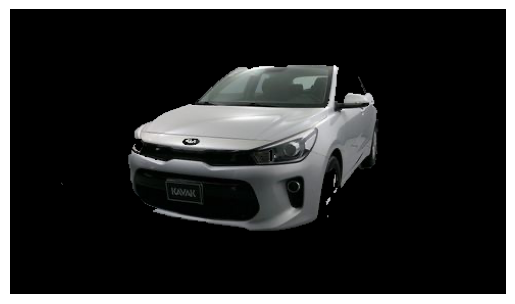

In [34]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('car.png')
mask = np.zeros(image.shape[:2], np.uint8)

coordinates = (1, 65)
rect = (50, 50, 370, 170)

bgd_model = np.zeros(coordinates, np.float64)
fgd_model = np.zeros(coordinates, np.float64)

cv2.grabCut(image, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT) # Actual Graph Cut implementation.

mask_refined = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8') # Foreground representation (sure and possible).
segmented_image = image * mask_refined[:, :, np.newaxis]

plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
